## Process PGE Data, Merge into a Single Table, and Basic EDA

### Preview of 2020-Q1

In [74]:
import pandas as pd 
import numpy as np

In [75]:
preview = pd.read_csv('PGE_2020-2024_Data\PGE_2020_Q1_ElectricUsageByZip.csv')
preview.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lydia\AppData\Local\Temp\ipykernel_29908\3322186260.py:1: SyntaxWarning: invalid escape sequence '\P'
  preview = pd.read_csv('PGE_2020-2024_Data\PGE_2020_Q1_ElectricUsageByZip.csv')


,ZIPCODE,MONTH,YEAR,CUSTOMERCLASS,COMBINED,TOTALCUSTOMERS,TOTALKWH,AVERAGEKWH
0,93101,1,2020,Elec- Agricultural,Y,0,0,NaN
1,93101,2,2020,Elec- Agricultural,Y,0,0,NaN
2,93101,3,2020,Elec- Agricultural,Y,0,0,NaN
3,93110,1,2020,Elec- Agricultural,Y,0,0,NaN
4,93110,2,2020,Elec- Agricultural,Y,0,0,NaN


In [76]:
preview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 0 to 7864
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ZIPCODE         7865 non-null   int64 
 1   MONTH           7865 non-null   int64 
 2   YEAR            7865 non-null   int64 
 3   CUSTOMERCLASS   7865 non-null   object
 4   COMBINED        7865 non-null   object
 5   TOTALCUSTOMERS  7865 non-null   object
 6   TOTALKWH        7865 non-null   object
 7   AVERAGEKWH      3508 non-null   object
dtypes: int64(3), object(5)
memory usage: 491.7+ KB


In [77]:
len(preview.AVERAGEKWH)

7865

### Merge files - Run only ONCE

In [78]:
# # Prepare file names 
# quarters = ['Q1', 'Q2', 'Q3', 'Q4']
# filenames = [f'PGE_{year}_{q}_ElectricUsageByZip.csv' for year in range(2020, 2025) for q in quarters]
# folder_paths = "PGE_2020-2024_Data"

# import os
# # Combine all valid files
# combined_df = pd.DataFrame()

# for fname in filenames:
#     full_path = os.path.join(folder_paths, fname)
#     if os.path.isfile(full_path):
#         df = pd.read_csv(full_path)
#         combined_df = pd.concat([combined_df, df], ignore_index=True)
#     else:
#         print(f'⚠️ File not found: {fname}, skipping.')

# # Save the combined file
# output_path = os.path.join(folder_paths, 'PGE_Combined_2020_2024.csv')
# combined_df.to_csv(output_path, index=False)
# print(f'✅ Combined file saved to: {output_path}')

In [79]:
# Import the newly combined file
pge = pd.read_csv('PGE_2020-2024_Data\PGE_Combined_2020_2024.csv')
pge.head()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lydia\AppData\Local\Temp\ipykernel_29908\245668876.py:2: SyntaxWarning: invalid escape sequence '\P'
  pge = pd.read_csv('PGE_2020-2024_Data\PGE_Combined_2020_2024.csv')


,ZIPCODE,MONTH,YEAR,CUSTOMERCLASS,COMBINED,TOTALCUSTOMERS,TOTALKWH,AVERAGEKWH
0,93101,1,2020,Elec- Agricultural,Y,0,0,NaN
1,93101,2,2020,Elec- Agricultural,Y,0,0,NaN
2,93101,3,2020,Elec- Agricultural,Y,0,0,NaN
3,93110,1,2020,Elec- Agricultural,Y,0,0,NaN
4,93110,2,2020,Elec- Agricultural,Y,0,0,NaN


In [80]:
pge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151950 entries, 0 to 151949
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ZIPCODE         151950 non-null  int64 
 1   MONTH           151950 non-null  int64 
 2   YEAR            151950 non-null  int64 
 3   CUSTOMERCLASS   151950 non-null  object
 4   COMBINED        151950 non-null  object
 5   TOTALCUSTOMERS  151950 non-null  object
 6   TOTALKWH        151950 non-null  object
 7   AVERAGEKWH      66100 non-null   object
dtypes: int64(3), object(5)
memory usage: 9.3+ MB


In [81]:
# Look at CUSTOMERCLASS
pge.CUSTOMERCLASS.unique()

array(['Elec- Agricultural', 'Elec- Commercial', 'Elec- Industrial',
       'Elec- Residential'], dtype=object)

In [82]:
# Look at COMBINED
# Accordingly, the public datasets meet Commission Decision rules\
# for public aggregation of data, as follows: a minimum of 100 Residential customers; a minimum of 15 \
# Non-Residential customers, with no single Non-Residential customer accounting for more than 15% of \
# the total consumption. If aggregation is not met, the consumption will be combined with a neighboring \
# ZIP code until the aggregation requirements are met.

pge.COMBINED.unique()

array(['Y', 'N'], dtype=object)

In [83]:
# Look at TOTALCUSTOMERS
pge.TOTALCUSTOMERS.unique()

array(['0', '259', '349', ..., '6,033', '6,289', '11,455'], dtype=object)

In [84]:
# Look at TOTALKWH
pge.TOTALKWH.unique()

array(['0', '14,046,480', '21,871,997', ..., '885,597', '1,002,262',
       '1,047,577'], dtype=object)

In [85]:
# Look at AVERAGEKWH
pge.AVERAGEKWH.unique()

array([nan, '54,234', '62,670', ..., '424,562', '387,123', '116'],
      dtype=object)

### Data Cleaning

In [86]:
# Convert the TOTALCUSTOMERS into int
pge['TOTALCUSTOMERS'] = (
    pge['TOTALCUSTOMERS']
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
    .astype('Int64')
)
pge.TOTALCUSTOMERS.unique()

<IntegerArray>
[    0,   259,   349,   108,   109,   115,  1555,   153,   244,   237,
 ...
 10183,  5894, 15176, 15166, 14395, 12237,  6038,  6033,  6289, 11455]
Length: 15187, dtype: Int64

In [87]:
# Convert COMBINED into string
pge['COMBINED'] = pge['COMBINED'].astype(str)
pge.COMBINED.unique()

array(['Y', 'N'], dtype=object)

In [88]:
# Convert the TOTALKWH into int
pge['TOTALKWH'] = (
    pge['TOTALKWH']
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
    .astype('Int64')
)
pge.TOTALKWH.unique()

<IntegerArray>
[       0, 14046480, 21871997,  2732693,  2892721,  1765301, 48369146,
  2009885,  3427278,  9211689,
 ...
   138965,   161580,   264640,   305148,   330838,   112371,   115775,
   885597,  1002262,  1047577]
Length: 65624, dtype: Int64

In [89]:
pge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151950 entries, 0 to 151949
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ZIPCODE         151950 non-null  int64 
 1   MONTH           151950 non-null  int64 
 2   YEAR            151950 non-null  int64 
 3   CUSTOMERCLASS   151950 non-null  object
 4   COMBINED        151950 non-null  object
 5   TOTALCUSTOMERS  151950 non-null  Int64 
 6   TOTALKWH        151950 non-null  Int64 
 7   AVERAGEKWH      66100 non-null   object
dtypes: Int64(2), int64(3), object(3)
memory usage: 9.6+ MB


### Trends of total kwh

C:\Users\Lydia\AppData\Local\Temp\ipykernel_29908\2396785270.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='ZIPCODE', bbox_to_anchor=(1.05, 1), loc='upper left')


<Figure size 1400x700 with 0 Axes>

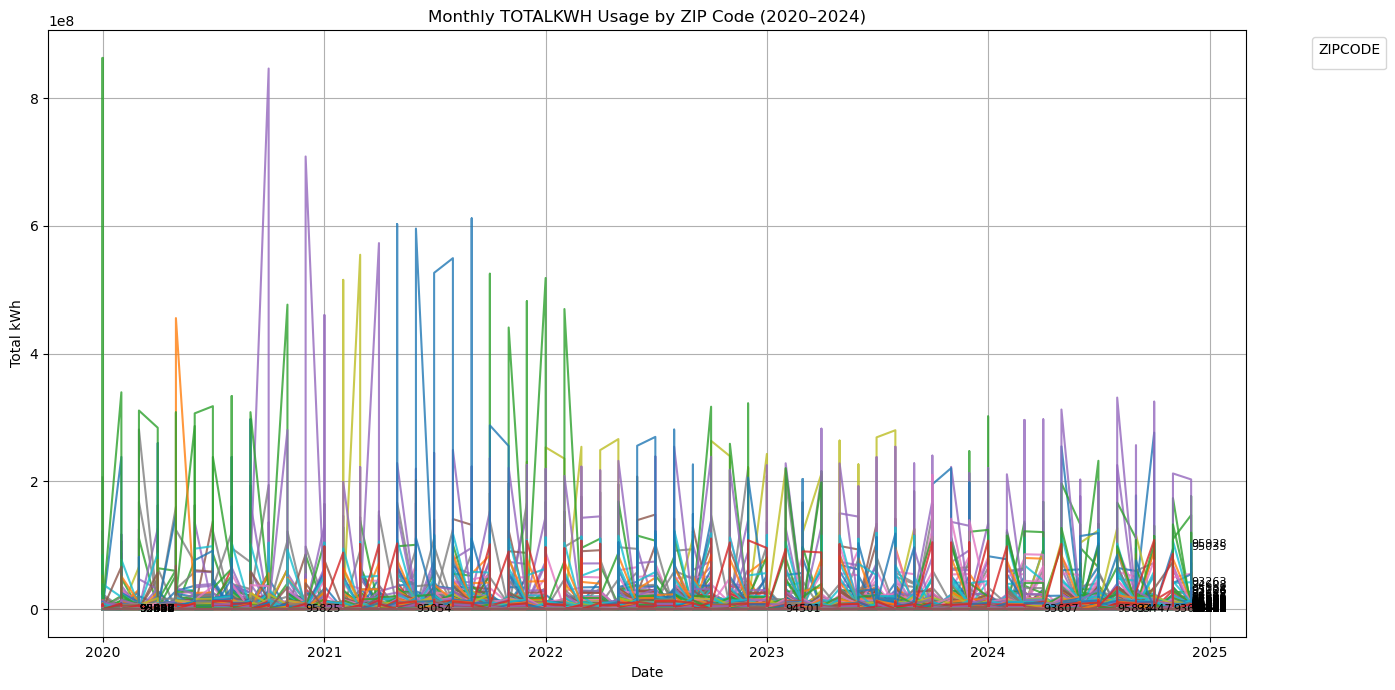

In [90]:
# Create a date time column
pge['DATE'] = pd.to_datetime(pge[['YEAR', 'MONTH']].assign(DAY=1))
pge = pge.sort_values('DATE')

# Plot the change in total kwh by month by zip code 
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

# Start the plot
plt.figure(figsize=(14, 7))

# Plot and label each ZIP line
for zip_code, group in pge.groupby('ZIPCODE'):
    plt.plot(group['DATE'], group['TOTALKWH'], alpha=0.8)
    
    # Add label at the last point
    last_point = group.iloc[-1]
    plt.text(
        last_point['DATE'], 
        last_point['TOTALKWH'], 
        str(zip_code),
        fontsize=8,
        va='center',
        ha='left'
    )

plt.title('Monthly TOTALKWH Usage by ZIP Code (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Total kWh')
plt.legend(title='ZIPCODE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

The graph looks too crowded, let's use a smoothed trendlines that calculate a 12-month rolling average for each zip code

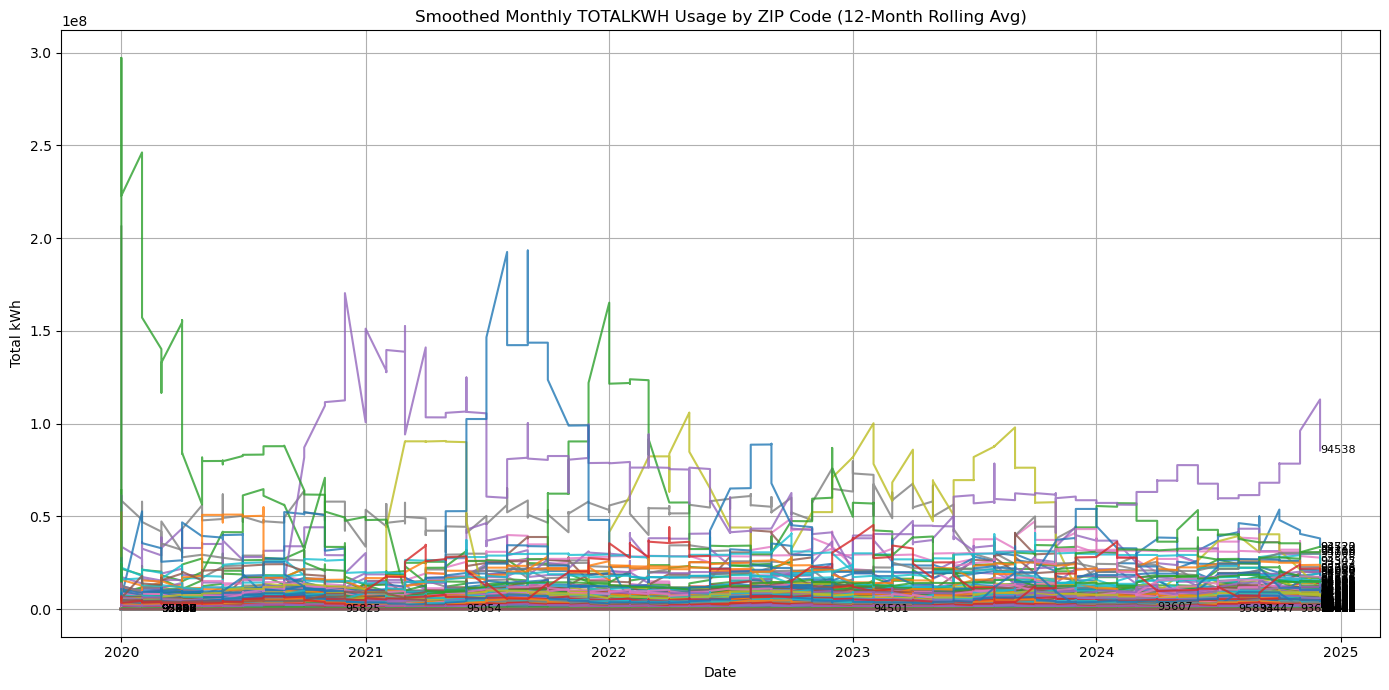

In [91]:
# Compute 12-month rolling average for TOTALKWH per ZIP
pge['TOTALKWH_ROLLING'] = pge.groupby('ZIPCODE')['TOTALKWH'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot
plt.figure(figsize=(14, 7))

# Plot and label each ZIP line
for zip_code, group in pge.groupby('ZIPCODE'):
    plt.plot(group['DATE'], group['TOTALKWH_ROLLING'], alpha=0.8)
    
    # Add label at the last point
    last_point = group.iloc[-1]
    plt.text(
        last_point['DATE'], 
        last_point['TOTALKWH_ROLLING'], 
        str(zip_code),
        fontsize=8,
        va='center',
        ha='left'
    )

plt.title('Smoothed Monthly TOTALKWH Usage by ZIP Code (12-Month Rolling Avg)')
plt.xlabel('Date')
plt.ylabel('Total kWh')
plt.grid(True)
plt.tight_layout()
# No legend
plt.show()

### Filter out the NAN in AVERAGEKWH and perform EDA on this column

In [92]:
pge_filter = pge[pge['AVERAGEKWH'].notna()]
pge_filter.AVERAGEKWH.unique()


array(['5,785', '4,997', '2,694', ..., '8,434', '558,930', '403,470'],
      dtype=object)

In [93]:
# Convert into int
pge_filter['AVERAGEKWH'] = (
    pge_filter['AVERAGEKWH']
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
    .astype('Int64')
)

C:\Users\Lydia\AppData\Local\Temp\ipykernel_29908\3011409990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pge_filter['AVERAGEKWH'] = (


C:\Users\Lydia\AppData\Local\Temp\ipykernel_29908\580029658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pge_filter['AVERAGEKWH_ROLLING'] = pge_filter.groupby('ZIPCODE')['AVERAGEKWH'].transform(lambda x: x.rolling(window=6, min_periods=1).mean())


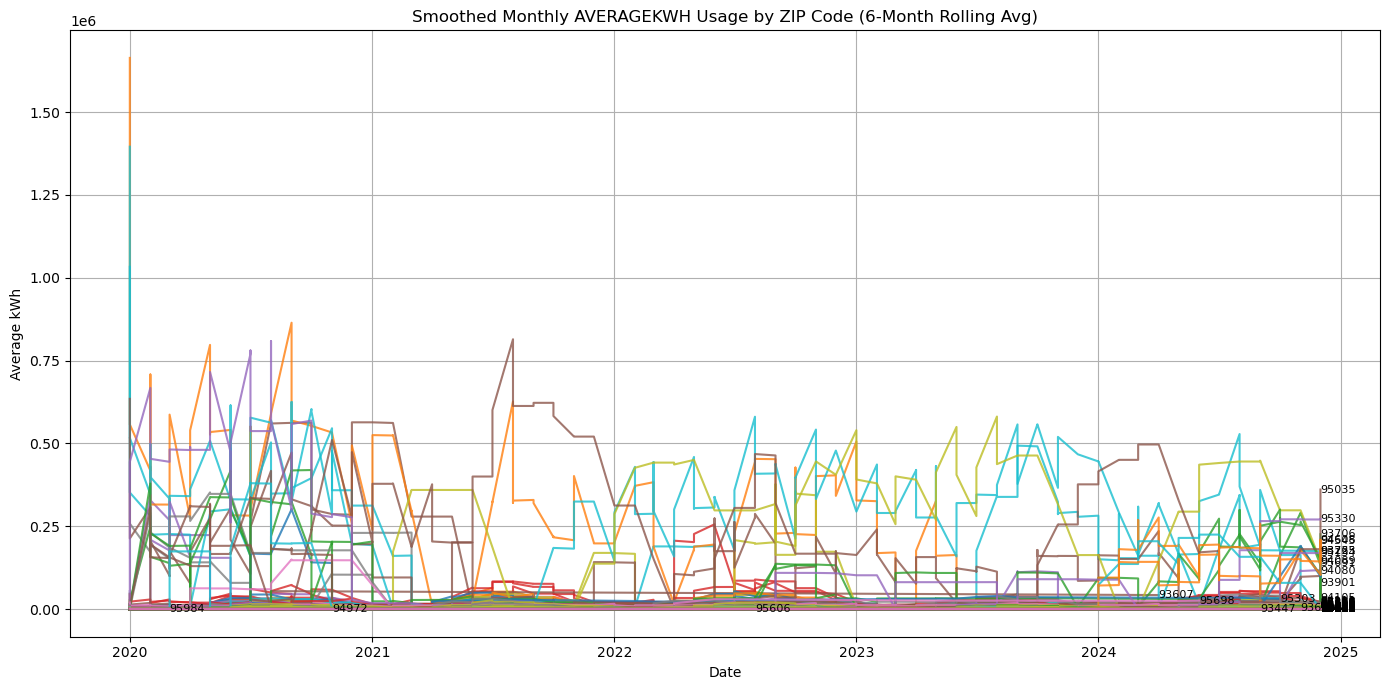

In [94]:
# Compute 6-month rolling average for AVERAGEKWH per ZIP
pge_filter['AVERAGEKWH_ROLLING'] = pge_filter.groupby('ZIPCODE')['AVERAGEKWH'].transform(lambda x: x.rolling(window=6, min_periods=1).mean())

# Plot
plt.figure(figsize=(14, 7))

# Plot and label each ZIP line
for zip_code, group in pge_filter.groupby('ZIPCODE'):
    plt.plot(group['DATE'], group['AVERAGEKWH_ROLLING'], alpha=0.8)
    
    # Add label at the last point
    last_point = group.iloc[-1]
    plt.text(
        last_point['DATE'], 
        last_point['AVERAGEKWH_ROLLING'], 
        str(zip_code),
        fontsize=8,
        va='center',
        ha='left'
    )

plt.title('Smoothed Monthly AVERAGEKWH Usage by ZIP Code (6-Month Rolling Avg)')
plt.xlabel('Date')
plt.ylabel('Average kWh')
plt.grid(True)
plt.tight_layout()
# No legend
plt.show()

### Incorporate the city/county name to the PGE table 

In [95]:
us_zip = pd.read_csv('US_Zip_City/uszips.csv')
us_zip.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16721.0,100.2,72001,Adjuntas,"{""72001"": 98.74, ""72141"": 1.26}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37510.0,477.6,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,48317.0,543.1,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5435.0,47.3,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,25413.0,264.4,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.82, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [96]:
zip_filter = us_zip[['zip', 'city', 'county_name', 'population', 'density']]
zip_filter.head()

,zip,city,county_name,population,density
0,601,Adjuntas,Adjuntas,16721.0,100.2
1,602,Aguada,Aguada,37510.0,477.6
2,603,Aguadilla,Aguadilla,48317.0,543.1
3,606,Maricao,Maricao,5435.0,47.3
4,610,Anasco,Añasco,25413.0,264.4


In [97]:
pge_merge_zip1 = pd.merge(pge_filter, zip_filter, left_on = 'ZIPCODE', right_on='zip', how = 'left')
pge_merge_zip1.head()

,ZIPCODE,MONTH,YEAR,CUSTOMERCLASS,COMBINED,TOTALCUSTOMERS,TOTALKWH,AVERAGEKWH,DATE,TOTALKWH_ROLLING,AVERAGEKWH_ROLLING,zip,city,county_name,population,density
0,95677,1,2020,Elec- Commercial,Y,982,5680604,5785,2020-01-01,5680604.0,5785.0,95677.0,Rocklin,Placer,28873.0,1146.4
1,95682,1,2020,Elec- Commercial,Y,894,4467591,4997,2020-01-01,4467591.0,4997.0,95682.0,Shingle Springs,El Dorado,29249.0,125.6
2,95685,1,2020,Elec- Commercial,Y,471,1268867,2694,2020-01-01,1268867.0,2694.0,95685.0,Sutter Creek,Amador,4611.0,44.5
3,95687,1,2020,Elec- Commercial,N,871,8318839,9551,2020-01-01,8318839.0,9551.0,95687.0,Vacaville,Solano,69741.0,604.3
4,95667,1,2020,Elec- Commercial,Y,1660,7902840,4761,2020-01-01,7902840.0,4761.0,95667.0,Placerville,El Dorado,36286.0,82.9


In [98]:
# Check if some area cannot be linked to a specific zip code
pge_merge_zip1.isnull().sum()

ZIPCODE                 0
MONTH                   0
YEAR                    0
CUSTOMERCLASS           0
COMBINED                0
TOTALCUSTOMERS          0
TOTALKWH                0
AVERAGEKWH              0
DATE                    0
TOTALKWH_ROLLING        0
AVERAGEKWH_ROLLING      0
zip                   244
city                  244
county_name           244
population            244
density               244
dtype: int64

In [99]:
len(pge_merge_zip1)

66100

In [100]:
# Look for the missing city and zip code
pge_merge_zip1[pge_merge_zip1['city'].isna()].ZIPCODE.unique()

array([95044, 95229, 95518, 95656, 93607, 93447], dtype=int64)

In [101]:
missing_zip = {'zip': [95044, 95229, 95518, 95656, 93607, 93447], 
               'city': ['Lexington Hills', 'Vallecito', 'Arcata', 'Mount Aukum', 'Burrel', 'Paso Robles'], 
               'county_name': ['Santa Clara', 'Calaveras', 'Humboldt', 'El Dorado', 'Fresno', 'San Luis Obispo'],
               'population': [2492, 535, 19012, 4, 27871, 31490], 
               'density': [513, 49.8, 2001.6, 0, 82, 1602.5]}
df_missing_data = pd.DataFrame(missing_zip)
df_missing_data['zip'].dtype
#a = pd.merge(pge_filter, df_missing_data, on = ['zip', 'city', 'county_name', 'population', 'density'], how = 'left')
#a.isnull().sum()

dtype('int64')

In [102]:
# Merge missing data to the zip code file
full_zip = [us_zip[['zip', 'city', 'county_name', 'population', 'density']], df_missing_data]
full_zip = pd.concat(full_zip)
full_zip[full_zip['zip']== 95044]

,zip,city,county_name,population,density
0,95044,Lexington Hills,Santa Clara,2492.0,513.0


In [103]:
# Re-run the merging process and ensure no more missing values
pge_merge_zip2 = pd.merge(pge_filter, full_zip, left_on = 'ZIPCODE', right_on='zip', how = 'left')
pge_merge_zip2.isnull().sum()

ZIPCODE               0
MONTH                 0
YEAR                  0
CUSTOMERCLASS         0
COMBINED              0
TOTALCUSTOMERS        0
TOTALKWH              0
AVERAGEKWH            0
DATE                  0
TOTALKWH_ROLLING      0
AVERAGEKWH_ROLLING    0
zip                   0
city                  0
county_name           0
population            0
density               0
dtype: int64

Now let's look at the distribution of the electricity usage by city and county

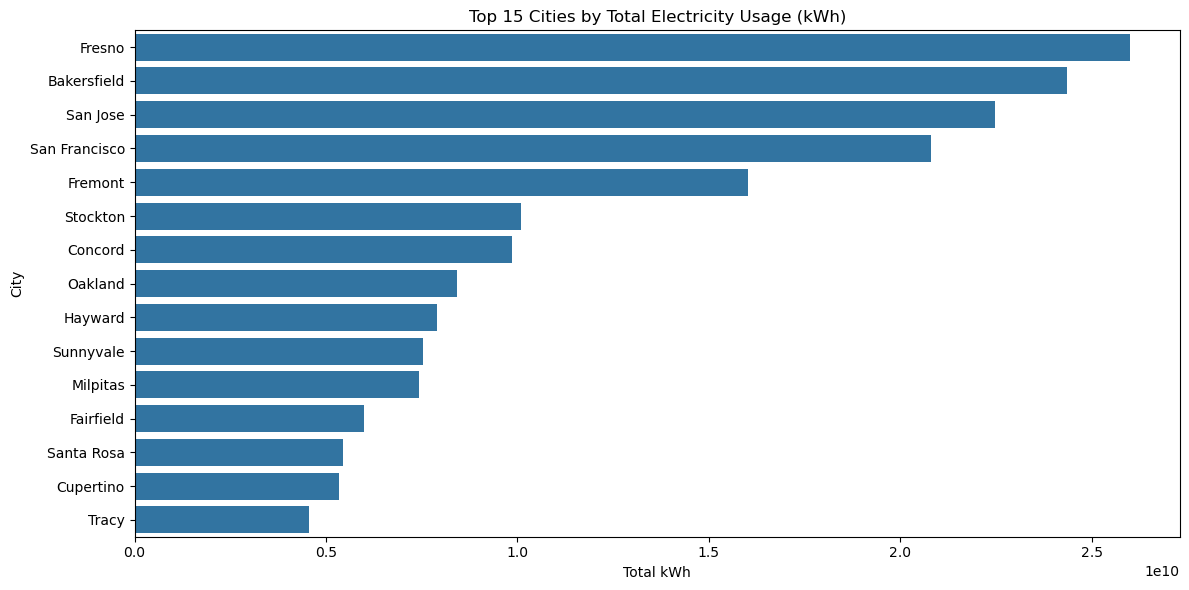

In [104]:
# Total energy use by city or county
import seaborn as sns

# Total kWh by city
city_usage = pge_merge_zip2.groupby('city')['TOTALKWH'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_usage.values, y=city_usage.index)
plt.title('Top 15 Cities by Total Electricity Usage (kWh)')
plt.xlabel('Total kWh')
plt.ylabel('City')
plt.tight_layout()
plt.show()

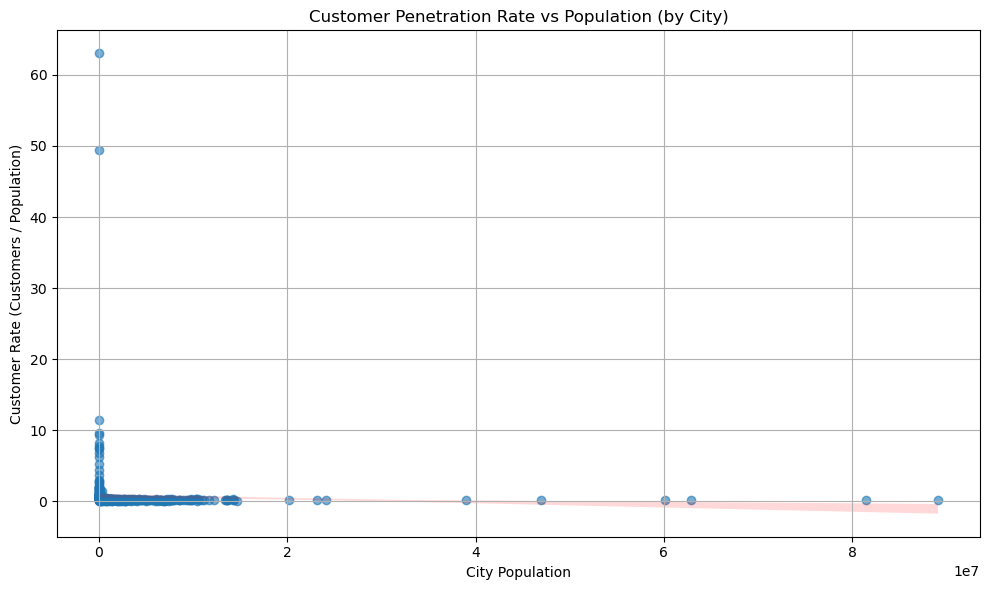

In [106]:
# Visualiza relationship between TOTALCUSTOMERS and population --- check the service coverage of PG&E
# Aggregate by city
city_agg = pge_merge_zip2.groupby('city')[['TOTALCUSTOMERS', 'population']].sum().reset_index()

# Calculate customer rate (% of population that are customers)
city_agg['CUSTOMER_RATE'] = city_agg['TOTALCUSTOMERS'] / city_agg['population']

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=city_agg, 
    x='population', 
    y='CUSTOMER_RATE', 
    scatter_kws={'alpha':0.6}, 
    line_kws={'color': 'red'}
)

plt.title('Customer Penetration Rate vs Population (by City)')
plt.xlabel('City Population')
plt.ylabel('Customer Rate (Customers / Population)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
pge_merge_zip2[pge_merge_zip2['population']==0]

,ZIPCODE,MONTH,YEAR,CUSTOMERCLASS,COMBINED,TOTALCUSTOMERS,TOTALKWH,AVERAGEKWH,DATE,TOTALKWH_ROLLING,AVERAGEKWH_ROLLING,zip,city,county_name,population,density
350,95364,1,2020,Elec- Residential,N,1001,263435,263,2020-01-01,131717.500000,263.000000,95364,Pinecrest,Tuolumne,0.0,0.0
375,95309,1,2020,Elec- Residential,N,118,78506,665,2020-01-01,39253.000000,665.000000,95309,Chinese Camp,Tuolumne,0.0,0.0
691,95613,1,2020,Elec- Residential,N,183,151949,830,2020-01-01,151949.000000,830.000000,95613,Coloma,El Dorado,0.0,0.0
753,95721,1,2020,Elec- Residential,N,271,35884,132,2020-01-01,17942.000000,132.000000,95721,Echo Lake,El Dorado,0.0,0.0
914,94562,1,2020,Elec- Residential,N,128,244310,1909,2020-01-01,244310.000000,1909.000000,94562,Oakville,Napa,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65065,95721,12,2024,Elec- Residential,Y,151,29615,196,2024-12-01,13390.500000,181.166667,95721,Echo Lake,El Dorado,0.0,0.0
65234,94562,12,2024,Elec- Residential,N,122,236207,1936,2024-12-01,230295.083333,2284.166667,94562,Oakville,Napa,0.0,0.0
65251,95364,12,2024,Elec- Residential,N,986,257002,261,2024-12-01,200898.833333,1539.666667,95364,Pinecrest,Tuolumne,0.0,0.0
65303,95613,12,2024,Elec- Residential,N,143,114752,802,2024-12-01,110535.666667,827.500000,95613,Coloma,El Dorado,0.0,0.0
